In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [17]:
#Data Processing
df = pd.read_csv("HEART.csv")
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
#Train the classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, early_stopping=True, random_state=42)
mlp.fit(X_train_scaled, y_train)
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=500, random_state=42)

In [19]:

# Predict on the test set
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



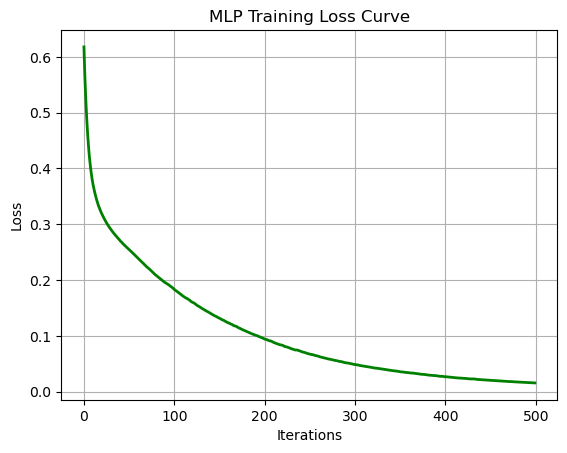

In [31]:

plt.plot(mlp.loss_curve_, color='green', linewidth=2)
plt.title("MLP Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop('thalach', axis=1)  
y = df['thalach']               



In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)


MLPRegressor(max_iter=1000, random_state=42)

In [47]:
y_pred = mlp_reg.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 378.1362454189853
R² Score: 0.302923647680563


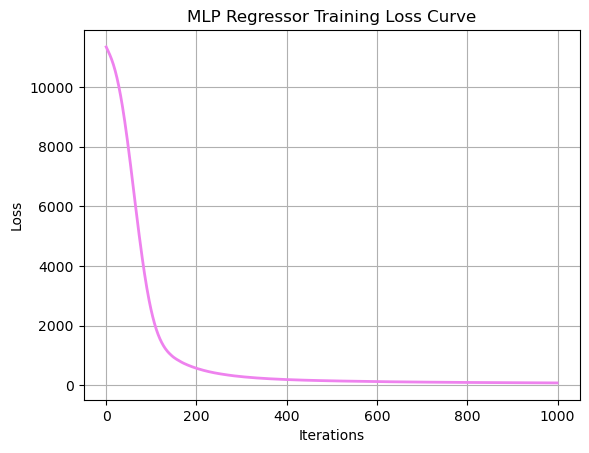

In [53]:
plt.plot(mlp_reg.loss_curve_, color='violet', linewidth=2)
plt.title("MLP Regressor Training Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


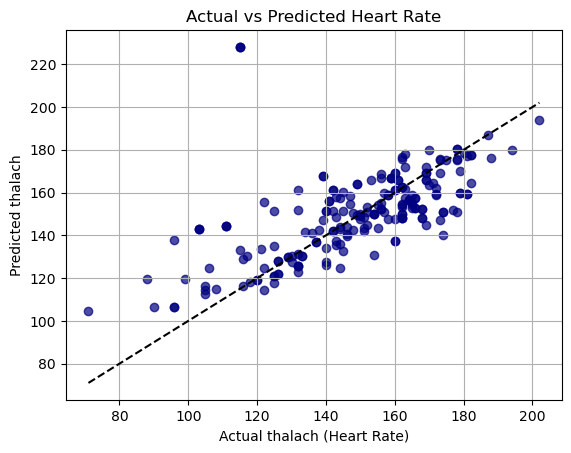

In [61]:

plt.scatter(y_test, y_pred, color='navy', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linestyle='--')
plt.xlabel("Actual thalach (Heart Rate)")
plt.ylabel("Predicted thalach")
plt.title("Actual vs Predicted Heart Rate")
plt.grid(True)
plt.show()
